In [157]:
import pandas as pd
import numpy as np
import json
import ast
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from itertools import combinations
from collections import defaultdict
import networkx as nx
import matplotlib.pyplot as plt
from sklearn.preprocessing import MultiLabelBinarizer

In [33]:
# Open the JSON file for reading
with open('../Data/sm_pads.json', 'r') as file:
    # Load the JSON data into a Python dictionary
    json_data = json.load(file)
data = pd.DataFrame(json_data['pads'])

In [412]:
data

,content,country,id,is_public,lang,sdgs,tags,title
0,Tikikil stove\n\nGIZ\nOffice contact GIZ Offic...,ETH,4364,True,en,"[Good health and well-being, Affordable and cl...","[clean energy, affordable energy, stove]",Tikikil stove
1,Alokito hridoy - enlightening the souls of chi...,BGD,4571,True,en,[Quality education],[education],Alokito hridoy - enlightening the souls of chi...
2,BioFabricating Materials\nSolution holder: Bat...,JOR,6099,False,en,"[Industry, innovation and infrastructure, Resp...","[nature-based solutions, design, sustainable f...",BioFabricating Materials
3,Circulamic\nSolution holder: Batoul Al-Rashdan...,JOR,6100,False,en,"[Industry, innovation and infrastructure, Resp...","[nature-based solutions, recycling, design, su...",Circulamic
4,Gakyid Ride (City Bus ride app)\nThis app prov...,BTN,4145,False,en,"[Good health and well-being, Sustainable citie...","[digital platform, innovation challenges, inno...",Gakyid Ride (City Bus ride app)
...,...,...,...,...,...,...,...,...
3383,Galvanized gutter\n\nGalvanized gutter for wat...,GTM,6084,False,en,"[Clean water and sanitation, Responsible consu...","[climate change, clean water]",Galvanized gutter
3384,Iron Gutter\n\nGalvanized gutter for water tra...,GTM,6085,False,en,"[Clean water and sanitation, Responsible consu...","[climate change, clean water, rain water colle...",Iron Gutter
3385,PVC Durm Gutter\n\n3 m durm gutter for water t...,GTM,6086,False,no,"[Clean water and sanitation, Responsible consu...","[climate change, clean water, water mobilization]",PVC Durm Gutter
3386,PVC pipe for rain descent\n\nPVC pipe for rain...,GTM,6089,False,en,"[Clean water and sanitation, Responsible consu...","[climate change, clean water, water mobilization]",PVC pipe for rain descent


In [4]:
# data.to_csv("capstone_data.csv")

In [53]:
tag_list = []
for tag in data['tags']:
    for sub_tag in tag:
        tag_list.append(sub_tag)
tag_list = set(tag_list)

In [54]:
tag_list

{'3d printing',
 'Acupuntura Urbana',
 'Bebidas Tradicionales',
 'Bicicleta',
 'Bicycle',
 'Cadenas de Valor',
 'Coca',
 'Conectividad',
 'Construction',
 'Contactlessness',
 'DIY',
 'Desalination',
 'Digital market',
 'Discapacidad',
 'Earthworm',
 'Energía',
 'Espacio público',
 'Free Education',
 'Funding',
 'Human-wildlife conflict',
 'IT Challange',
 'Iluminación',
 'Internet',
 'Internet access',
 'Juguetes',
 'King tides',
 'Library',
 'Local Consumption',
 'Localization',
 'Material Reciclado',
 'Mobiliario urbano',
 'Movilidad',
 'NUebos materiales.',
 'PVC',
 'Peace',
 'Peace & Equality (Justice)',
 'Pension platform',
 'Poverty',
 'Reciclaje',
 'Recycle Waste Plant',
 'SME',
 'Social media campaign',
 'Tubos',
 'Venta',
 'Weather',
 'academia',
 'access',
 'access to basic services',
 'access to education',
 'access to information',
 'access to technology & internet',
 'accessibility',
 'active citizenship',
 'activism',
 'adventure tourism',
 'advertising',
 'affordability'

In [56]:
len(tag_list)

788

In [7]:
# Create a DataFrame with the words
df = pd.DataFrame({'words': list(tag_list)})

# TF-IDF vectorization
tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(df['words'])

# K-Means clustering
kmeans = KMeans(n_clusters=10, random_state=42)
df['cluster'] = kmeans.fit_predict(tfidf_matrix)

# Print the clusters
for cluster_id in range(df['cluster'].nunique()):
    print(f'Cluster {cluster_id}:')
    print(df[df['cluster'] == cluster_id]['words'])
    print()

/Users/komal/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Cluster 0:
19              public services
152         new public services
425    public sector innovation
435                public space
475         digital public good
606      public policy planning
690               public health
735               public spaces
Name: words, dtype: object

Cluster 1:
40          reneweable energy
109               wind energy
182              green energy
233            energy storage
266        energy transitions
288         energy efficiency
371    women in energy sector
392              clean energy
472          renewable energy
514              solar energy
515           waste to energy
522        sustainable energy
535           energy efficent
564             energy saving
641                bio energy
662         affordable energy
743                    energy
783        alternative energy
Name: words, dtype: object

Cluster 2:
281    responsive governance
424             e-governance
494               governance
Name: words, dtype: object



In [8]:
df[df["cluster"] == 6]

,words,cluster
1,Construction,6
5,trade,6
6,informal service,6
7,"covid-19 , response",6
8,carbon emission,6
...,...,...
782,geolocalization,6
784,cultural heritage,6
785,changemaking skills,6
786,women participation,6


In [14]:
grouped = df[['cluster', 'words']].groupby('cluster')

# Specify the file path for saving the text file
file_path = 'kmeans_clusters.txt'

# Open the file in write mode and save the data
with open(file_path, 'w') as file:
    for cluster_id, group in grouped:
        file.write(f"Cluster {cluster_id}:\n")
        tags = group['words'].to_list()
        file.write(str(tags))
#         for tag in tags:
#             file.write(f"{tag}, ")
        file.write("\n\n")

print(f"Data saved to {file_path}")

Data saved to kmeans_clusters.txt


# Co-occurrence

In [11]:
data

,content,country,id,is_public,lang,sdgs,tags,title
0,Tikikil stove\n\nGIZ\nOffice contact GIZ Offic...,ETH,4364,True,en,"[Good health and well-being, Affordable and cl...","[clean energy, affordable energy, stove]",Tikikil stove
1,Alokito hridoy - enlightening the souls of chi...,BGD,4571,True,en,[Quality education],[education],Alokito hridoy - enlightening the souls of chi...
2,BioFabricating Materials\nSolution holder: Bat...,JOR,6099,False,en,"[Industry, innovation and infrastructure, Resp...","[nature-based solutions, design, sustainable f...",BioFabricating Materials
3,Circulamic\nSolution holder: Batoul Al-Rashdan...,JOR,6100,False,en,"[Industry, innovation and infrastructure, Resp...","[nature-based solutions, recycling, design, su...",Circulamic
4,Gakyid Ride (City Bus ride app)\nThis app prov...,BTN,4145,False,en,"[Good health and well-being, Sustainable citie...","[digital platform, innovation challenges, inno...",Gakyid Ride (City Bus ride app)
...,...,...,...,...,...,...,...,...
3383,Galvanized gutter\n\nGalvanized gutter for wat...,GTM,6084,False,en,"[Clean water and sanitation, Responsible consu...","[climate change, clean water]",Galvanized gutter
3384,Iron Gutter\n\nGalvanized gutter for water tra...,GTM,6085,False,en,"[Clean water and sanitation, Responsible consu...","[climate change, clean water, rain water colle...",Iron Gutter
3385,PVC Durm Gutter\n\n3 m durm gutter for water t...,GTM,6086,False,no,"[Clean water and sanitation, Responsible consu...","[climate change, clean water, water mobilization]",PVC Durm Gutter
3386,PVC pipe for rain descent\n\nPVC pipe for rain...,GTM,6089,False,en,"[Clean water and sanitation, Responsible consu...","[climate change, clean water, water mobilization]",PVC pipe for rain descent


In [22]:
exploded_data = data.explode('tags')

In [23]:
exploded_data

,content,country,id,is_public,lang,sdgs,tags,title
0,Tikikil stove\n\nGIZ\nOffice contact GIZ Offic...,ETH,4364,True,en,"[Good health and well-being, Affordable and cl...",clean energy,Tikikil stove
0,Tikikil stove\n\nGIZ\nOffice contact GIZ Offic...,ETH,4364,True,en,"[Good health and well-being, Affordable and cl...",affordable energy,Tikikil stove
0,Tikikil stove\n\nGIZ\nOffice contact GIZ Offic...,ETH,4364,True,en,"[Good health and well-being, Affordable and cl...",stove,Tikikil stove
1,Alokito hridoy - enlightening the souls of chi...,BGD,4571,True,en,[Quality education],education,Alokito hridoy - enlightening the souls of chi...
2,BioFabricating Materials\nSolution holder: Bat...,JOR,6099,False,en,"[Industry, innovation and infrastructure, Resp...",nature-based solutions,BioFabricating Materials
...,...,...,...,...,...,...,...,...
3386,PVC pipe for rain descent\n\nPVC pipe for rain...,GTM,6089,False,en,"[Clean water and sanitation, Responsible consu...",clean water,PVC pipe for rain descent
3386,PVC pipe for rain descent\n\nPVC pipe for rain...,GTM,6089,False,en,"[Clean water and sanitation, Responsible consu...",water mobilization,PVC pipe for rain descent
3387,T Connection\n\nPVC T for connection between d...,GTM,6091,False,en,"[Clean water and sanitation, Responsible consu...",clean energy,T Connection
3387,T Connection\n\nPVC T for connection between d...,GTM,6091,False,en,"[Clean water and sanitation, Responsible consu...",climate change,T Connection


In [26]:
document_counts = exploded_data.groupby('tags').agg({'tags':'count'})

In [28]:
document_counts

,tags
tags,
3d printing,13
Acupuntura Urbana,2
Bebidas Tradicionales,1
Bicicleta,2
Bicycle,21
...,...
youth,137
youth activism,4
youth and unemployment,75


In [32]:
df = exploded_data

# Create a dictionary to store tag co-occurrence counts
co_occurrence_counts = defaultdict(int)

# Loop through the DataFrame and update co-occurrence counts
for _, group in df.groupby('id'):
    tags = group['tags'].tolist()
    for tag1, tag2 in combinations(tags, 2):
        co_occurrence_counts[(tag1, tag2)] += 1
        co_occurrence_counts[(tag2, tag1)] += 1

# Convert the co-occurrence counts dictionary into a DataFrame
co_occurrence_df = pd.DataFrame(list(co_occurrence_counts.items()), columns=['Tags', 'Co-occurrence Count'])

# Split the 'Tags' column into two separate columns
co_occurrence_df[['Tag1', 'Tag2']] = pd.DataFrame(co_occurrence_df['Tags'].tolist(), index=co_occurrence_df.index)

# Drop the 'Tags' column
co_occurrence_df.drop(columns=['Tags'], inplace=True)

# Display the co-occurrence DataFrame
print(co_occurrence_df)

       Co-occurrence Count               Tag1               Tag2
0                        2   circular economy         livelihood
1                        2         livelihood   circular economy
2                        1             energy             safety
3                        1             safety             energy
4                        1             energy       urbanization
...                    ...                ...                ...
15837                    1     transportation  policy innovation
15838                    1       public space  urban development
15839                    1  urban development       public space
15840                    1  urban development     transportation
15841                    1     transportation  urban development

[15842 rows x 3 columns]


In [33]:
co_occurrence_df

,Co-occurrence Count,Tag1,Tag2
0,2,circular economy,livelihood
1,2,livelihood,circular economy
2,1,energy,safety
3,1,safety,energy
4,1,energy,urbanization
...,...,...,...
15837,1,transportation,policy innovation
15838,1,public space,urban development
15839,1,urban development,public space
15840,1,urban development,transportation


In [41]:
co_occurrence_df[co_occurrence_df['Tag1'] == 'youth']

,Co-occurrence Count,Tag1,Tag2
163,10,youth,agriculture
167,14,youth,entrepreneurship
169,1,youth,urbanization
177,8,youth,economic growth
184,20,youth,youth and unemployment
...,...,...,...
14363,1,youth,water management
15591,1,youth,water
15594,1,youth,youth activism
15601,1,youth,women empowerment


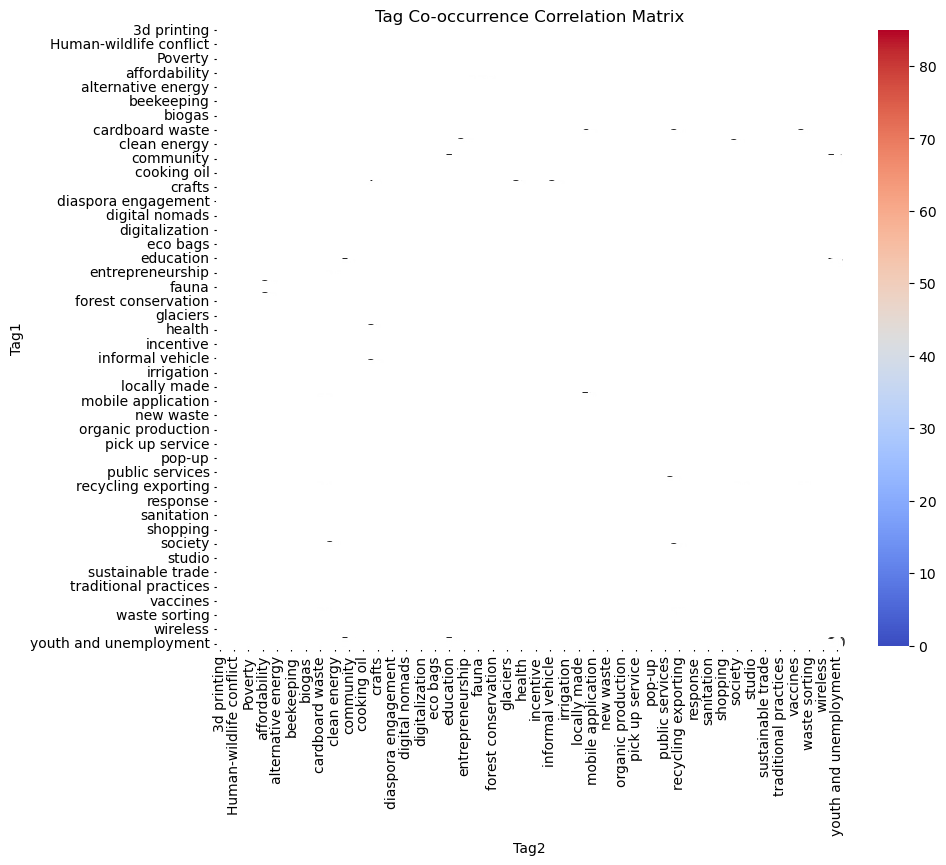

In [37]:
# Create a pivot table to create the correlation matrix
correlation_matrix = co_occurrence_df.pivot_table(values='Co-occurrence Count', index='Tag1', columns='Tag2', \
                                                  fill_value=0)

# Create a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title("Tag Co-occurrence Correlation Matrix")
plt.show()

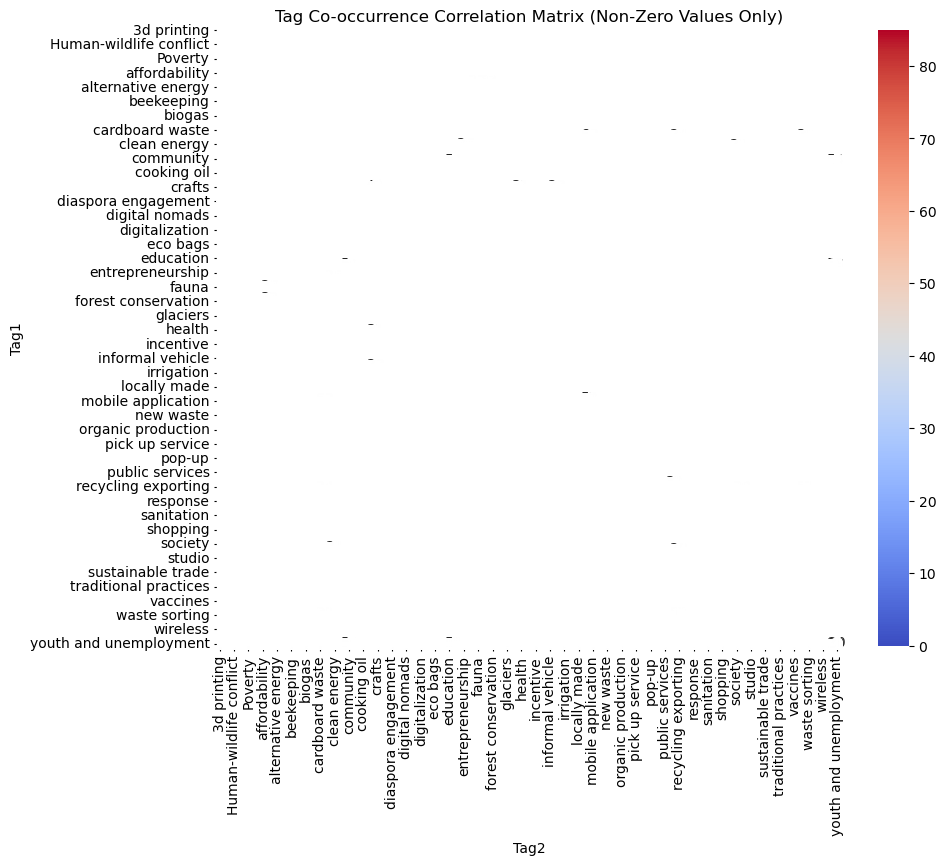

In [42]:
# Remove rows and columns with all zeros
correlation_matrix = correlation_matrix.loc[(correlation_matrix != 0).any(axis=1), \
                                            (correlation_matrix != 0).any(axis=0)]

# Create a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title("Tag Co-occurrence Correlation Matrix (Non-Zero Values Only)")
plt.show()

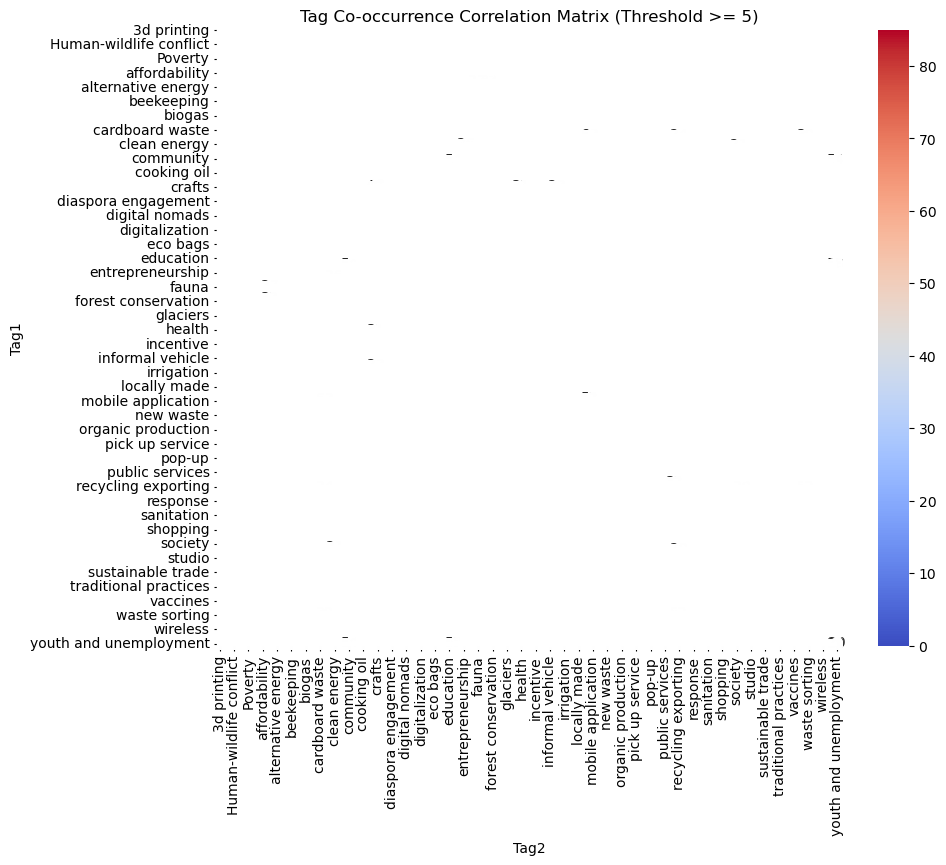

In [44]:
# Set a threshold for co-occurrence counts
threshold = 5  # Adjust this threshold as needed

# Apply the threshold to the correlation matrix
correlation_matrix = correlation_matrix.applymap(lambda x: x if x >= threshold else 0)

# Create a heatmap of the thresholded correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title(f"Tag Co-occurrence Correlation Matrix (Threshold >= {threshold})")
plt.show()

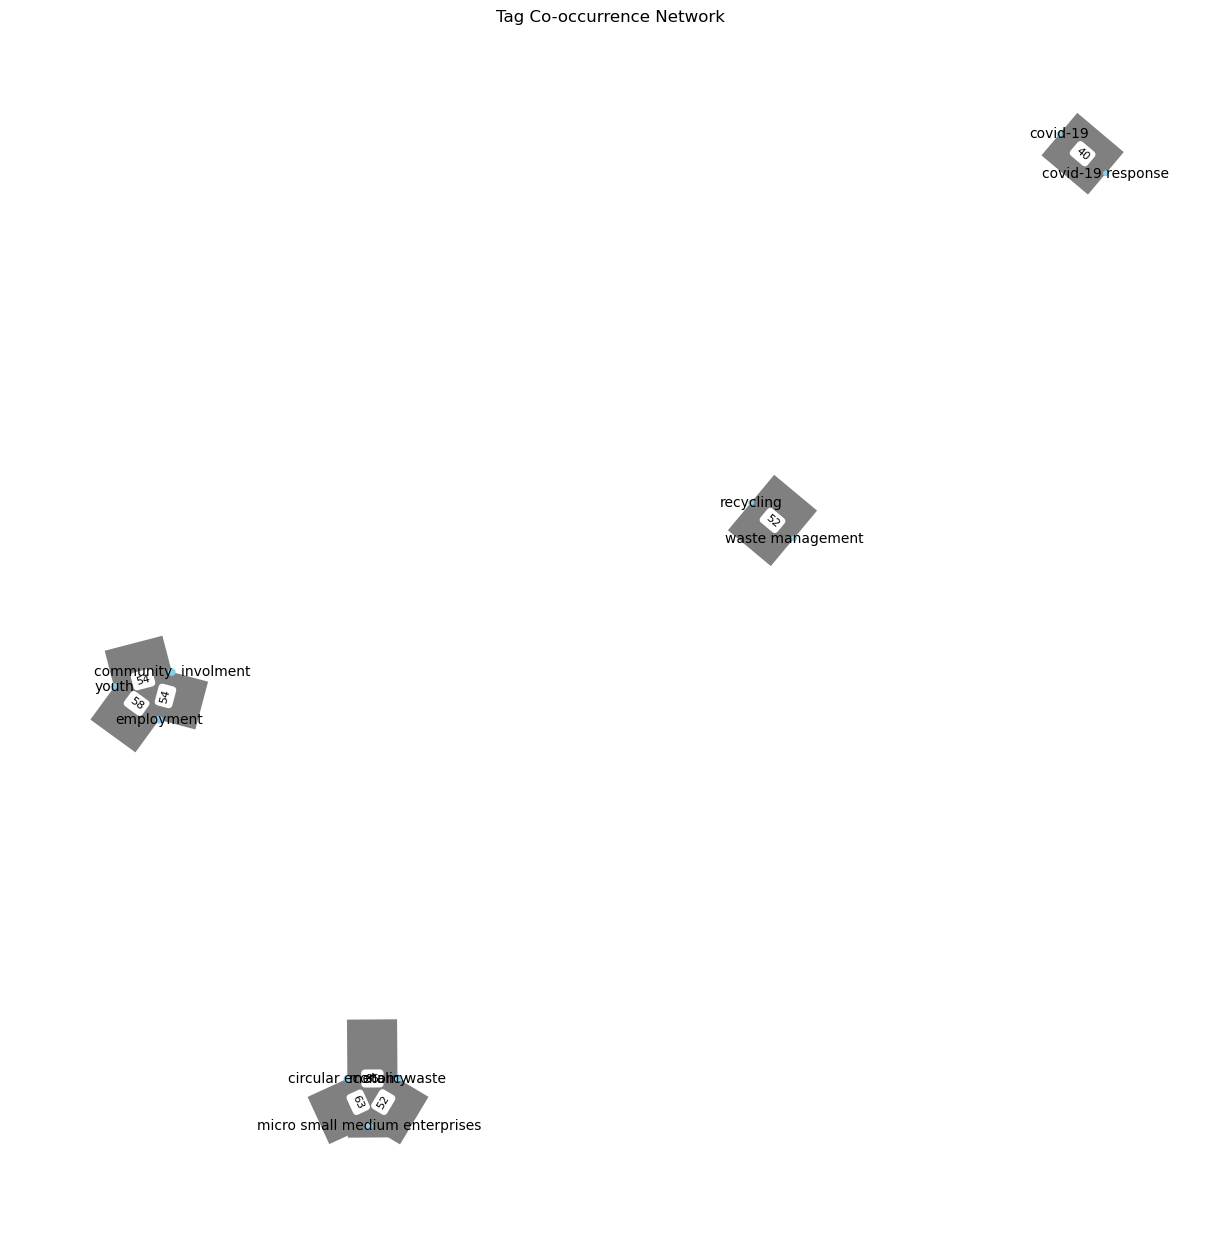

In [60]:
# Create a graph for co-occurrence relationships
G = nx.Graph()

# Define a threshold for co-occurrence counts
threshold = 35  # Adjust this threshold as needed

# Loop through the co-occurrence counts and add edges to the graph based on the threshold
for (tag1, tag2), count in co_occurrence_counts.items():
    if count >= threshold:
        G.add_edge(tag1, tag2, weight=count)

# Set node sizes based on node degree (number of connections)
node_sizes = [10 * G.degree(node) for node in G.nodes]

# Create a layout for the graph
layout = nx.spring_layout(G, seed=42)

# Draw the graph
plt.figure(figsize=(12, 12))
nx.draw(G, layout, with_labels=True, node_size=node_sizes, node_color='skyblue',
        font_size=10, width=[d['weight'] for u, v, d in G.edges(data=True)], edge_color='gray')
edge_labels = {(tag1, tag2): d['weight'] for tag1, tag2, d in G.edges(data=True)}
nx.draw_networkx_edge_labels(G, layout, edge_labels=edge_labels, font_size=8)
plt.title("Tag Co-occurrence Network")
plt.axis('off')
plt.show()

In [49]:
co_occurrence_df[co_occurrence_df['Tag1'] == 'lgbtiq']

,Co-occurrence Count,Tag1,Tag2
11059,1,lgbtiq,hiv prevention


# Root word clustering

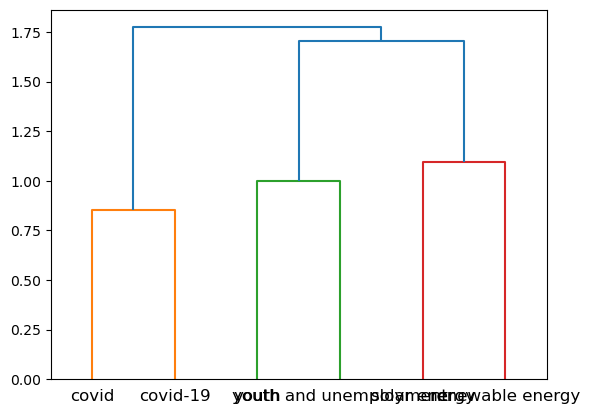

Cluster 2: covid, covid-19
Cluster 1: youth, youth and unemployment
Cluster 4: solar energy
Cluster 3: renewable energy


In [64]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

# Sample tags
tags = ["covid", "covid-19", "youth", "youth and unemployment", "solar energy", "renewable energy"]

# TF-IDF vectorization
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(tags)

# Agglomerative clustering
agg_cluster = AgglomerativeClustering(n_clusters=None, distance_threshold=1, linkage='ward')
agg_cluster.fit(tfidf_matrix.toarray())

# Dendrogram for visualization
linkage_matrix = linkage(tfidf_matrix.toarray(), 'ward')
dendrogram(linkage_matrix, labels=tags)
plt.show()

# Print the tags and their clusters
clusters = {}
for i, label in enumerate(agg_cluster.labels_):
    if label not in clusters:
        clusters[label] = [tags[i]]
    else:
        clusters[label].append(tags[i])

for cluster_id, cluster_tags in clusters.items():
    print(f"Cluster {cluster_id + 1}: {', '.join(cluster_tags)}")


In [86]:
data[data['id'] == 3522]

,content,country,id,is_public,lang,sdgs,tags,title
457,ECO PUBLI TOIL\nDESCRIPTIF DE LA SOLUTION:\nIl...,BFA,3522,False,fr,"[No poverty, Clean water and sanitation, Susta...",[],ECO PUBLI TOIL


In [88]:
exploded_data

,content,country,id,is_public,lang,sdgs,tags,title
0,Tikikil stove\n\nGIZ\nOffice contact GIZ Offic...,ETH,4364,True,en,"[Good health and well-being, Affordable and cl...",clean energy,Tikikil stove
0,Tikikil stove\n\nGIZ\nOffice contact GIZ Offic...,ETH,4364,True,en,"[Good health and well-being, Affordable and cl...",affordable energy,Tikikil stove
0,Tikikil stove\n\nGIZ\nOffice contact GIZ Offic...,ETH,4364,True,en,"[Good health and well-being, Affordable and cl...",stove,Tikikil stove
1,Alokito hridoy - enlightening the souls of chi...,BGD,4571,True,en,[Quality education],education,Alokito hridoy - enlightening the souls of chi...
2,BioFabricating Materials\nSolution holder: Bat...,JOR,6099,False,en,"[Industry, innovation and infrastructure, Resp...",nature-based solutions,BioFabricating Materials
...,...,...,...,...,...,...,...,...
3386,PVC pipe for rain descent\n\nPVC pipe for rain...,GTM,6089,False,en,"[Clean water and sanitation, Responsible consu...",clean water,PVC pipe for rain descent
3386,PVC pipe for rain descent\n\nPVC pipe for rain...,GTM,6089,False,en,"[Clean water and sanitation, Responsible consu...",water mobilization,PVC pipe for rain descent
3387,T Connection\n\nPVC T for connection between d...,GTM,6091,False,en,"[Clean water and sanitation, Responsible consu...",clean energy,T Connection
3387,T Connection\n\nPVC T for connection between d...,GTM,6091,False,en,"[Clean water and sanitation, Responsible consu...",climate change,T Connection


In [89]:
cleaned_data = exploded_data[~exploded_data['tags'].isna()]

In [94]:
all_tags = list(cleaned_data['tags'].unique())
all_tags

['clean energy',
 'affordable energy',
 'stove',
 'education',
 'nature-based solutions',
 'design',
 'sustainable fashion',
 'recycling',
 'digital platform',
 'innovation challenges',
 'innovation during covid-19',
 'reduction of emissions',
 'water supply',
 'wind pump',
 'energy saving',
 'women in energy sector',
 'waste for livelihoods',
 'upcycling',
 'sustainable energy',
 'energy',
 'water management',
 'biogas',
 'water',
 'natural ingredient',
 'single use plastic',
 'waste management',
 'renewable energy',
 'solar energy',
 'agriculture',
 'climate change',
 'clean cooking',
 'energy efficiency',
 'cooking',
 'environment friendly',
 'oven',
 'environmental education',
 'flooding',
 'Weather',
 'better livelihood',
 'women empowerment',
 'alternative energy',
 'reneweable energy',
 'green technology',
 'irrigation',
 'green ideas',
 'health',
 'hygiene',
 'the vulnerable members of our society',
 'cooperativism',
 'sustainable manufacturing',
 'policy innovation',
 'public 

In [78]:
type(tags[0])

str

In [95]:
len(all_tags)

788

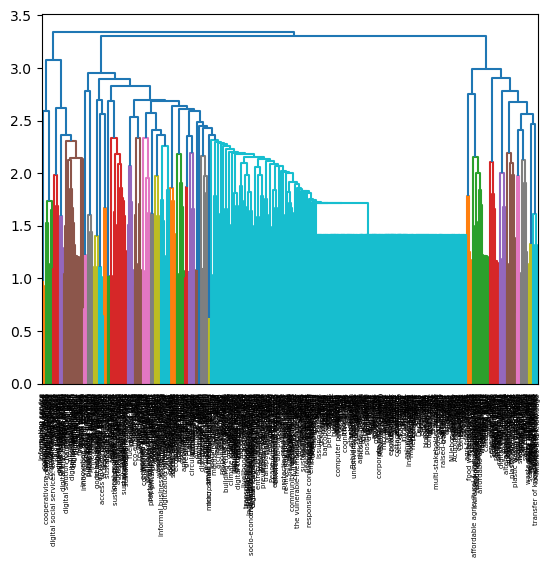

Cluster 11: clean energy, clean cities
Cluster 552: affordable energy
Cluster 157: stove, cooking stove
Cluster 25: education, Free Education, digital education
Cluster 133: nature-based solutions, nature-based seawalls
Cluster 15: design, architecture & design, landscape design
Cluster 121: sustainable fashion, fashion
Cluster 88: recycling, women recycling
Cluster 36: digital platform, Pension platform, platform
Cluster 541: innovation challenges
Cluster 110: innovation during covid-19, innovations during covid-19
Cluster 502: reduction of emissions
Cluster 529: water supply
Cluster 32: wind pump, wind energy, wind
Cluster 66: energy saving, water saving
Cluster 86: women in energy sector, women in agriculture
Cluster 477: waste for livelihoods
Cluster 16: upcycling, upcycling containers, plastic upcycling
Cluster 68: sustainable energy, energy
Cluster 247: water management, waste water management
Cluster 418: biogas
Cluster 50: water, clean water
Cluster 579: natural ingredient
Clus

In [96]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

# Sample tags
tags = ["covid", "covid-19", "youth", "youth and unemployment", "solar energy", "renewable energy"]

# TF-IDF vectorization
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(all_tags)

# Agglomerative clustering
agg_cluster = AgglomerativeClustering(n_clusters=None, distance_threshold=1, linkage='ward')
agg_cluster.fit(tfidf_matrix.toarray())

# Dendrogram for visualization
linkage_matrix = linkage(tfidf_matrix.toarray(), 'ward')
dendrogram(linkage_matrix, labels=all_tags)
plt.show()

# Print the tags and their clusters
clusters = {}
for i, label in enumerate(agg_cluster.labels_):
    if label not in clusters:
        clusters[label] = [all_tags[i]]
    else:
        clusters[label].append(all_tags[i])

for cluster_id, cluster_tags in clusters.items():
    print(f"Cluster {cluster_id + 1}: {', '.join(cluster_tags)}")

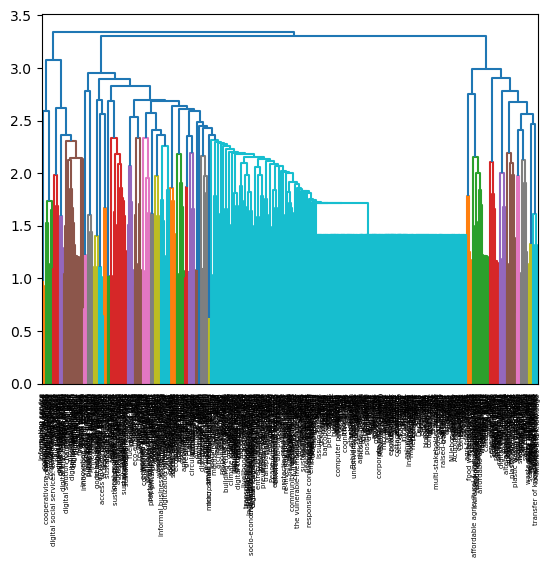

Cluster 30: clean energy, clean cities, fair and clean food
Cluster 33: affordable energy, sustainable energy, energy, renewable energy, reneweable energy, energy efficent, waste to energy, energy transitions, energy storage
Cluster 55: stove, outdoor stove, kerosene stove, modified stove, cooking stove
Cluster 50: education, environmental education, quality education, Free Education, digital education, statistics education
Cluster 133: nature-based solutions, nature-based seawalls
Cluster 86: design, architecture & design, landscape design, interior design
Cluster 121: sustainable fashion, fashion
Cluster 70: recycling, women recycling, glass recycling, recycling exporting, bread recycling
Cluster 144: digital platform, Pension platform, platform
Cluster 11: innovation challenges, innovation, public sector innovation, frugal innovation, open innovation, process innovation, pulic sector innovation, punlic sector innovation
Cluster 23: innovation during covid-19, covid-19 response, inno

In [97]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

# Sample tags
tags = ["covid", "covid-19", "youth", "youth and unemployment", "solar energy", "renewable energy"]

# TF-IDF vectorization
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(all_tags)

# Agglomerative clustering
agg_cluster = AgglomerativeClustering(n_clusters=None, distance_threshold=1.5, linkage='ward')
agg_cluster.fit(tfidf_matrix.toarray())

# Dendrogram for visualization
linkage_matrix = linkage(tfidf_matrix.toarray(), 'ward')
dendrogram(linkage_matrix, labels=all_tags)
plt.show()

# Print the tags and their clusters
clusters = {}
for i, label in enumerate(agg_cluster.labels_):
    if label not in clusters:
        clusters[label] = [all_tags[i]]
    else:
        clusters[label].append(all_tags[i])

for cluster_id, cluster_tags in clusters.items():
    print(f"Cluster {cluster_id + 1}: {', '.join(cluster_tags)}")

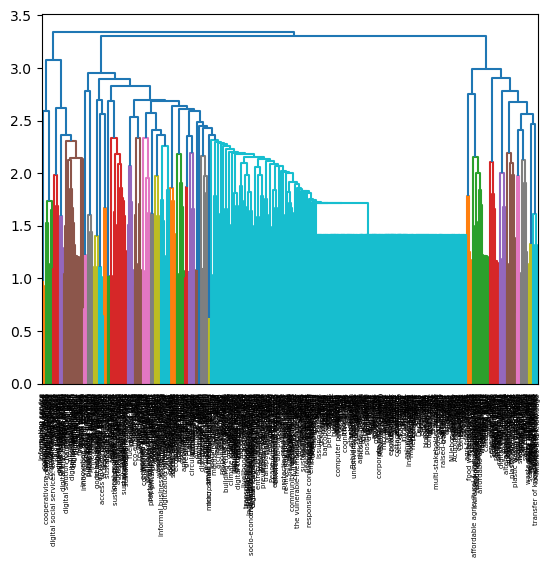

Cluster 30: clean energy, clean cities, fair and clean food
Cluster 16: affordable energy, sustainable energy, energy, renewable energy, reneweable energy, energy efficent, waste to energy, energy transitions, energy storage
Cluster 55: stove, outdoor stove, kerosene stove, modified stove, cooking stove
Cluster 50: education, environmental education, quality education, Free Education, digital education, statistics education
Cluster 133: nature-based solutions, nature-based seawalls
Cluster 86: design, architecture & design, landscape design, interior design
Cluster 121: sustainable fashion, fashion
Cluster 70: recycling, women recycling, glass recycling, recycling exporting, bread recycling
Cluster 144: digital platform, Pension platform, platform
Cluster 14: innovation challenges, innovation, frugal innovation, open innovation, process innovation
Cluster 11: innovation during covid-19, covid-19 response, innovations during covid-19, covid-19, covid-19 , response, covid
Cluster 99: red

In [100]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

# Sample tags
tags = ["covid", "covid-19", "youth", "youth and unemployment", "solar energy", "renewable energy"]

# TF-IDF vectorization
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(all_tags)

# Agglomerative clustering
agg_cluster = AgglomerativeClustering(n_clusters=None, distance_threshold=1.3, linkage='ward')
agg_cluster.fit(tfidf_matrix.toarray())

# Dendrogram for visualization
linkage_matrix = linkage(tfidf_matrix.toarray(), 'ward')
dendrogram(linkage_matrix, labels=all_tags)
plt.show()

# Print the tags and their clusters
clusters = {}
for i, label in enumerate(agg_cluster.labels_):
    if label not in clusters:
        clusters[label] = [all_tags[i]]
    else:
        clusters[label].append(all_tags[i])

for cluster_id, cluster_tags in clusters.items():
    print(f"Cluster {cluster_id + 1}: {', '.join(cluster_tags)}")

In [ ]:
# Check for vis
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import AgglomerativeClustering
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Sample tags
tags = ["covid", "covid-19", "youth", "youth and unemployment", "solar energy", "renewable energy"]

# TF-IDF vectorization
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(tags)

# Agglomerative clustering
agg_cluster = AgglomerativeClustering(n_clusters=None, distance_threshold=0.5, linkage='ward')
agg_cluster.fit(tfidf_matrix.toarray())

# Apply t-SNE for dimensionality reduction
tsne = TSNE(n_components=2)
reduced_tags = tsne.fit_transform(tfidf_matrix.toarray())

# Create a DataFrame for visualization
data = pd.DataFrame({'Tag': tags, 'Cluster': agg_cluster.labels_, 'X': reduced_tags[:, 0], 'Y': reduced_tags[:, 1]})

# Plot clusters using seaborn
plt.figure(figsize=(10, 8))
sns.scatterplot(data=data, x='X', y='Y', hue='Cluster', palette='viridis')
plt.title('Tag Clusters')
plt.show()


# Text Summarization

In [126]:
data

,content,country,id,is_public,lang,sdgs,tags,title
0,Tikikil stove\n\nGIZ\nOffice contact GIZ Offic...,ETH,4364,True,en,"[Good health and well-being, Affordable and cl...","[clean energy, affordable energy, stove]",Tikikil stove
1,Alokito hridoy - enlightening the souls of chi...,BGD,4571,True,en,[Quality education],[education],Alokito hridoy - enlightening the souls of chi...
2,BioFabricating Materials\nSolution holder: Bat...,JOR,6099,False,en,"[Industry, innovation and infrastructure, Resp...","[nature-based solutions, design, sustainable f...",BioFabricating Materials
3,Circulamic\nSolution holder: Batoul Al-Rashdan...,JOR,6100,False,en,"[Industry, innovation and infrastructure, Resp...","[nature-based solutions, recycling, design, su...",Circulamic
4,Gakyid Ride (City Bus ride app)\nThis app prov...,BTN,4145,False,en,"[Good health and well-being, Sustainable citie...","[digital platform, innovation challenges, inno...",Gakyid Ride (City Bus ride app)
...,...,...,...,...,...,...,...,...
3383,Galvanized gutter\n\nGalvanized gutter for wat...,GTM,6084,False,en,"[Clean water and sanitation, Responsible consu...","[climate change, clean water]",Galvanized gutter
3384,Iron Gutter\n\nGalvanized gutter for water tra...,GTM,6085,False,en,"[Clean water and sanitation, Responsible consu...","[climate change, clean water, rain water colle...",Iron Gutter
3385,PVC Durm Gutter\n\n3 m durm gutter for water t...,GTM,6086,False,no,"[Clean water and sanitation, Responsible consu...","[climate change, clean water, water mobilization]",PVC Durm Gutter
3386,PVC pipe for rain descent\n\nPVC pipe for rain...,GTM,6089,False,en,"[Clean water and sanitation, Responsible consu...","[climate change, clean water, water mobilization]",PVC pipe for rain descent


In [140]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
import yake

df = data

# Preprocess the text data
def preprocess_text(text):
    text = re.sub(r'[^a-zA-Z\s]', '', text)  # Remove non-alphabetic characters
    text = text.lower()  # Convert to lowercase
    return text

df['cleaned_content'] = df['content'].apply(preprocess_text)

# Keyword extraction
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

def extract_keywords(text):
    # Remove stop words to improve keyword extraction
    text_without_stopwords = ' '.join([word for word in text.split() if word not in stop_words])
    
    # Initialize the YAKE keyword extractor
    kw_extractor = yake.KeywordExtractor()

    # Extract keywords
    keywords = kw_extractor.extract_keywords(text_without_stopwords)

    # Get the top 5 keywords
    top_keywords = [keyword for keyword, score in keywords[:5]]

    return ', '.join(top_keywords)

df['keywords'] = df['cleaned_content'].apply(extract_keywords)

# Display the DataFrame with extracted keywords
print(df)

[nltk_data] Downloading package stopwords to /Users/komal/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


                                                content country    id  \
0     Tikikil stove\n\nGIZ\nOffice contact GIZ Offic...     ETH  4364   
1     Alokito hridoy - enlightening the souls of chi...     BGD  4571   
2     BioFabricating Materials\nSolution holder: Bat...     JOR  6099   
3     Circulamic\nSolution holder: Batoul Al-Rashdan...     JOR  6100   
4     Gakyid Ride (City Bus ride app)\nThis app prov...     BTN  4145   
...                                                 ...     ...   ...   
3383  Galvanized gutter\n\nGalvanized gutter for wat...     GTM  6084   
3384  Iron Gutter\n\nGalvanized gutter for water tra...     GTM  6085   
3385  PVC Durm Gutter\n\n3 m durm gutter for water t...     GTM  6086   
3386  PVC pipe for rain descent\n\nPVC pipe for rain...     GTM  6089   
3387  T Connection\n\nPVC T for connection between d...     GTM  6091   

      is_public lang                                               sdgs  \
0          True   en  [Good health and well-bein

In [141]:
df.to_csv('yake.csv')

# NER

In [148]:
import pandas as pd
import spacy

df = data

# Load the spaCy model
nlp = spacy.load("en_core_web_sm")

# Function to extract entities
def extract_entities(text):
    doc = nlp(text)
    entities = [ent.text for ent in doc.ents]
    return ', '.join(entities)

df['extracted_entities'] = df['content'].apply(extract_entities)

# Display the DataFrame with extracted entities
print(df)

                                                content country    id  \
0     Tikikil stove\n\nGIZ\nOffice contact GIZ Offic...     ETH  4364   
1     Alokito hridoy - enlightening the souls of chi...     BGD  4571   
2     BioFabricating Materials\nSolution holder: Bat...     JOR  6099   
3     Circulamic\nSolution holder: Batoul Al-Rashdan...     JOR  6100   
4     Gakyid Ride (City Bus ride app)\nThis app prov...     BTN  4145   
...                                                 ...     ...   ...   
3383  Galvanized gutter\n\nGalvanized gutter for wat...     GTM  6084   
3384  Iron Gutter\n\nGalvanized gutter for water tra...     GTM  6085   
3385  PVC Durm Gutter\n\n3 m durm gutter for water t...     GTM  6086   
3386  PVC pipe for rain descent\n\nPVC pipe for rain...     GTM  6089   
3387  T Connection\n\nPVC T for connection between d...     GTM  6091   

      is_public lang                                               sdgs  \
0          True   en  [Good health and well-bein

In [149]:
df.to_csv('ner.csv')

# Co-occurrence

In [7]:
with open('../data/sbert_clusters.txt', 'r') as file:
    # Read the entire contents of the file
    lines = file.read()

lines
# clusters = {}
# for line in lines:
#     if "Cluster" in line:
#         print(line)
#         print()
#     else:
#         print("List")
#         print(line)

"Cluster  1\n['hygiene', 'awareness raising', 'awareness', 'sanitation', 'pest control', 'sanitary waste', 'safety', 'worker safety', 'sustainable pest control', 'polution', 'hiv prevention', 'road traffic safety', 'monitoring', 'environmental monitoring', 'polution reduction', 'vaccines', 'return vat', 'odor polution']\n\nCluster  2\n['entrepreneurship', 'micro small medium enterprises', 'social impact', 'entrepreneurial eco-system', 'entrepreneurial ecosystem', 'micro, small, medium enterprises', 'social enterprise', 'small medium enterprises', 'business for change', 'corporate responsability', 'smes', 'social enterprise model', 're-invented business models', 'social entrepreneurship', 'business support', 'sme', 'socio-economic impact and needs assessment']\n\nCluster  3\n['transportation', 'tourism', 'transportation & mobility', 'adventure tourism', 'community tourism', 'mobility', 'sustainable tourism', 'migration', 'circular migration', 'diaspora engagement', 'human mobility', 'tr

In [21]:
clusters = lines.split("\n")
clusters

['Cluster  1',
 "['hygiene', 'awareness raising', 'awareness', 'sanitation', 'pest control', 'sanitary waste', 'safety', 'worker safety', 'sustainable pest control', 'polution', 'hiv prevention', 'road traffic safety', 'monitoring', 'environmental monitoring', 'polution reduction', 'vaccines', 'return vat', 'odor polution']",
 '',
 'Cluster  2',
 "['entrepreneurship', 'micro small medium enterprises', 'social impact', 'entrepreneurial eco-system', 'entrepreneurial ecosystem', 'micro, small, medium enterprises', 'social enterprise', 'small medium enterprises', 'business for change', 'corporate responsability', 'smes', 'social enterprise model', 're-invented business models', 'social entrepreneurship', 'business support', 'sme', 'socio-economic impact and needs assessment']",
 '',
 'Cluster  3',
 "['transportation', 'tourism', 'transportation & mobility', 'adventure tourism', 'community tourism', 'mobility', 'sustainable tourism', 'migration', 'circular migration', 'diaspora engagement',

In [ ]:
for cluster in clusters:
    cluster_list = cluster.split("\n")
    cluster_list = [tag.strip() for tag in cluster_list if tag.strip()]
    key = cluster_list[0]
    value = ast.literal_eval(cluster_list[1])
    print(key)
    print(value)
    print()

In [26]:
# Read the content of the text file
with open('../data/sbert_clusters.txt', 'r') as file:
    lines = file.readlines()

# Initialize an empty dictionary to store clusters
clusters_dict = {}

# Process each line in the file
current_cluster = None
for line in lines:
    # Strip leading and trailing whitespaces
    line = line.strip()

    # Check if the line starts with 'Cluster'
    if line.startswith('Cluster'):
        current_cluster = line  # Set the current cluster name
        clusters_dict[current_cluster] = []  # Initialize an empty list for the cluster
    elif line.startswith('[') and line.endswith(']'):
        # If inside a cluster and the line is a list, convert it to a list and append to the dictionary
        clusters_dict[current_cluster] = line

# Convert string representations to actual lists using a custom function
def convert_to_list(s):
    try:
        # Assuming the string is enclosed in square brackets, remove extra whitespaces and evaluate as a list
        return [item.strip() for item in s[1:-1].split(',')]
    except (ValueError, TypeError, IndexError):
        # Handle errors gracefully
        return []

converted_clusters = {key: convert_to_list(value) for key, value in clusters_dict.items()}
sbert_clusters = {key: [value.strip("'") for value in values] for key, values in converted_clusters.items()}

{'Cluster  1': "['hygiene', 'awareness raising', 'awareness', 'sanitation', 'pest control', 'sanitary waste', 'safety', 'worker safety', 'sustainable pest control', 'polution', 'hiv prevention', 'road traffic safety', 'monitoring', 'environmental monitoring', 'polution reduction', 'vaccines', 'return vat', 'odor polution']", 'Cluster  2': "['entrepreneurship', 'micro small medium enterprises', 'social impact', 'entrepreneurial eco-system', 'entrepreneurial ecosystem', 'micro, small, medium enterprises', 'social enterprise', 'small medium enterprises', 'business for change', 'corporate responsability', 'smes', 'social enterprise model', 're-invented business models', 'social entrepreneurship', 'business support', 'sme', 'socio-economic impact and needs assessment']", 'Cluster  3': "['transportation', 'tourism', 'transportation & mobility', 'adventure tourism', 'community tourism', 'mobility', 'sustainable tourism', 'migration', 'circular migration', 'diaspora engagement', 'human mobilit

In [35]:
data

,content,country,id,is_public,lang,sdgs,tags,title
0,Tikikil stove\n\nGIZ\nOffice contact GIZ Offic...,ETH,4364,True,en,"[Good health and well-being, Affordable and cl...","[clean energy, affordable energy, stove]",Tikikil stove
1,Alokito hridoy - enlightening the souls of chi...,BGD,4571,True,en,[Quality education],[education],Alokito hridoy - enlightening the souls of chi...
2,BioFabricating Materials\nSolution holder: Bat...,JOR,6099,False,en,"[Industry, innovation and infrastructure, Resp...","[nature-based solutions, design, sustainable f...",BioFabricating Materials
3,Circulamic\nSolution holder: Batoul Al-Rashdan...,JOR,6100,False,en,"[Industry, innovation and infrastructure, Resp...","[nature-based solutions, recycling, design, su...",Circulamic
4,Gakyid Ride (City Bus ride app)\nThis app prov...,BTN,4145,False,en,"[Good health and well-being, Sustainable citie...","[digital platform, innovation challenges, inno...",Gakyid Ride (City Bus ride app)
...,...,...,...,...,...,...,...,...
3383,Galvanized gutter\n\nGalvanized gutter for wat...,GTM,6084,False,en,"[Clean water and sanitation, Responsible consu...","[climate change, clean water]",Galvanized gutter
3384,Iron Gutter\n\nGalvanized gutter for water tra...,GTM,6085,False,en,"[Clean water and sanitation, Responsible consu...","[climate change, clean water, rain water colle...",Iron Gutter
3385,PVC Durm Gutter\n\n3 m durm gutter for water t...,GTM,6086,False,no,"[Clean water and sanitation, Responsible consu...","[climate change, clean water, water mobilization]",PVC Durm Gutter
3386,PVC pipe for rain descent\n\nPVC pipe for rain...,GTM,6089,False,en,"[Clean water and sanitation, Responsible consu...","[climate change, clean water, water mobilization]",PVC pipe for rain descent


In [57]:
len(sbert_clusters)

55

In [81]:
import pandas as pd
import numpy as np
from itertools import combinations
from sklearn.preprocessing import MultiLabelBinarizer

df = data

# Create a MultiLabelBinarizer to encode tags
mlb = MultiLabelBinarizer()
tag_matrix = mlb.fit_transform(df['tags'])

# Initialize a co-occurrence matrix
num_clusters = len(sbert_clusters)
cooccurrence_matrix = np.zeros((num_clusters, num_clusters), dtype=int)

# Iterate over rows and tags
for row in tag_matrix:
    indices = np.where(row == 1)[0]
    print(indices)

    # Check for tag pairs in the same cluster
    for i, j in combinations(indices, 2):
        print(i, j)
        for cluster, tags in sbert_clusters.items():
            if mlb.classes_[i] in tags and mlb.classes_[j] in tags:
                cluster_index = int(cluster.split()[-1]) - 1  # Extract cluster index from the cluster name
                cooccurrence_matrix[cluster_index, cluster_index] += 1

# Print the co-occurrence matrix
print("Co-occurrence Matrix:")
print(cooccurrence_matrix)


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [82]:
cooccurrence_matrix

array([[  4,   0,   0, ...,   0,   0,   0],
       [  0,  26,   0, ...,   0,   0,   0],
       [  0,   0,  35, ...,   0,   0,   0],
       ...,
       [  0,   0,   0, ...,   4,   0,   0],
       [  0,   0,   0, ...,   0, 259,   0],
       [  0,   0,   0, ...,   0,   0,   0]])

In [76]:
df['tags']

0                [clean energy, affordable energy, stove]
1                                             [education]
2       [nature-based solutions, design, sustainable f...
3       [nature-based solutions, recycling, design, su...
4       [digital platform, innovation challenges, inno...
                              ...                        
3383                        [climate change, clean water]
3384    [climate change, clean water, rain water colle...
3385    [climate change, clean water, water mobilization]
3386    [climate change, clean water, water mobilization]
3387    [clean energy, climate change, water mobilizat...
Name: tags, Length: 3388, dtype: object

In [78]:
tag_matrix

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

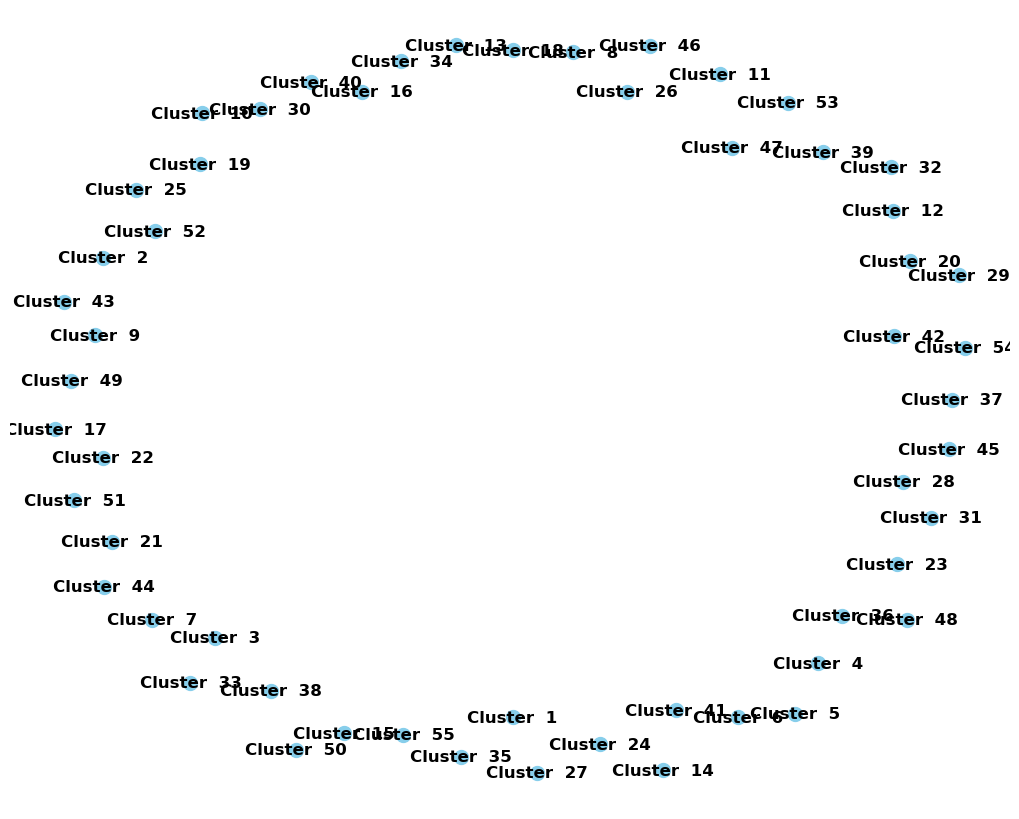

In [73]:
# Example cluster names
cluster_names = sbert_clusters.keys()

# Create a graph
G = nx.Graph()

# Add nodes to the graph
G.add_nodes_from(cluster_names)

# Add weighted edges to the graph based on the co-occurrence matrix
for i in range(len(cluster_names)):
    for j in range(i + 1, len(cluster_names)):
        weight = cooccurrence_matrix[i, j]
        if weight > 0:
            G.add_edge(cluster_names[i], cluster_names[j], weight=weight)

plt.figure(figsize=(10, 8))
            
# Draw the graph
pos = nx.spring_layout(G, k=2, scale=2)
nx.draw(G, pos, with_labels=True, font_weight='bold', node_size=100, node_color='skyblue', font_color='black')

# Add edge labels
edge_labels = {(i, j): cooccurrence_matrix[i, j] for i, j, d in G.edges(data=True)}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

# Show the graph
plt.show()

In [ ]:
# Example cluster names
cluster_names = sbert_clusters.keys()

# Create a graph for co-occurrence relationships
G = nx.Graph()

# Define a threshold for co-occurrence counts
threshold = 35  # Adjust this threshold as needed

# Add nodes to the graph
G.add_nodes_from(cluster_names)

# Loop through the co-occurrence counts and add edges to the graph based on the threshold
for (tag1, tag2), count in co_occurrence_counts.items():
    if count >= threshold:
        G.add_edge(tag1, tag2, weight=count)

# Set node sizes based on node degree (number of connections)
node_sizes = [10 * G.degree(node) for node in G.nodes]

# Create a layout for the graph
layout = nx.spring_layout(G, seed=42)

# Draw the graph
plt.figure(figsize=(12, 12))
nx.draw(G, layout, with_labels=True, node_size=node_sizes, node_color='skyblue',
        font_size=10, width=[d['weight'] for u, v, d in G.edges(data=True)], edge_color='gray')
edge_labels = {(tag1, tag2): d['weight'] for tag1, tag2, d in G.edges(data=True)}
nx.draw_networkx_edge_labels(G, layout, edge_labels=edge_labels, font_size=8)
plt.title("Tag Co-occurrence Network")
plt.axis('off')
plt.show()

# New Co-occurrence

In [86]:
import pandas as pd
import numpy as np
from itertools import combinations
from sklearn.preprocessing import MultiLabelBinarizer

df = data

# Create a MultiLabelBinarizer to encode tags
mlb = MultiLabelBinarizer()
tag_matrix = mlb.fit_transform(df['tags'])

# Initialize a co-occurrence matrix
num_clusters = len(sbert_clusters)
cooccurrence_matrix = np.zeros((num_clusters, num_clusters), dtype=int)

# Assign each tag to the cluster it belongs to
tag_to_cluster = {}
for tag in mlb.classes_:
    for cluster, tags in sbert_clusters.items():
        if tag.lower() in tags:
            tag_to_cluster[tag] = cluster

# Iterate over rows and tags
for row in tag_matrix:
    indices = np.where(row == 1)[0]

    # Check for tag pairs and update correlation matrix
    for i, j in combinations(indices, 2):
        cluster_i = tag_to_cluster[mlb.classes_[i]]
        cluster_j = tag_to_cluster[mlb.classes_[j]]
        cooccurrence_matrix[int(cluster_i.split()[-1]) - 1, int(cluster_j.split()[-1]) - 1] += 1
        cooccurrence_matrix[int(cluster_j.split()[-1]) - 1, int(cluster_i.split()[-1]) - 1] += 1

# Print the correlation matrix
print("Correlation Matrix:")
print(cooccurrence_matrix)

KeyError: 'micro, small, medium enterprises'

In [107]:
df

,content,country,id,is_public,lang,sdgs,tags,title
0,Tikikil stove\n\nGIZ\nOffice contact GIZ Offic...,ETH,4364,True,en,"[Good health and well-being, Affordable and cl...","[clean energy, affordable energy, stove]",Tikikil stove
1,Alokito hridoy - enlightening the souls of chi...,BGD,4571,True,en,[Quality education],[education],Alokito hridoy - enlightening the souls of chi...
2,BioFabricating Materials\nSolution holder: Bat...,JOR,6099,False,en,"[Industry, innovation and infrastructure, Resp...","[nature-based solutions, design, sustainable f...",BioFabricating Materials
3,Circulamic\nSolution holder: Batoul Al-Rashdan...,JOR,6100,False,en,"[Industry, innovation and infrastructure, Resp...","[nature-based solutions, recycling, design, su...",Circulamic
4,Gakyid Ride (City Bus ride app)\nThis app prov...,BTN,4145,False,en,"[Good health and well-being, Sustainable citie...","[digital platform, innovation challenges, inno...",Gakyid Ride (City Bus ride app)
...,...,...,...,...,...,...,...,...
3383,Galvanized gutter\n\nGalvanized gutter for wat...,GTM,6084,False,en,"[Clean water and sanitation, Responsible consu...","[climate change, clean water]",Galvanized gutter
3384,Iron Gutter\n\nGalvanized gutter for water tra...,GTM,6085,False,en,"[Clean water and sanitation, Responsible consu...","[climate change, clean water, rain water colle...",Iron Gutter
3385,PVC Durm Gutter\n\n3 m durm gutter for water t...,GTM,6086,False,no,"[Clean water and sanitation, Responsible consu...","[climate change, clean water, water mobilization]",PVC Durm Gutter
3386,PVC pipe for rain descent\n\nPVC pipe for rain...,GTM,6089,False,en,"[Clean water and sanitation, Responsible consu...","[climate change, clean water, water mobilization]",PVC pipe for rain descent


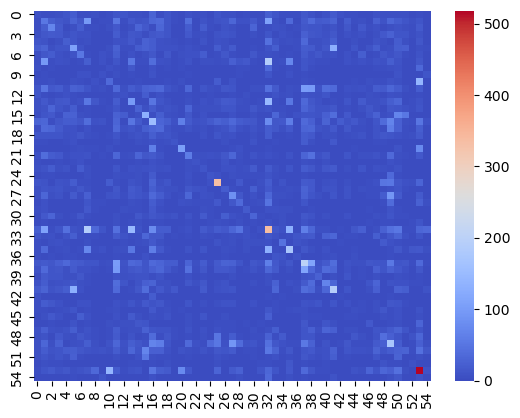

In [111]:
sns.heatmap(correlation_matrix, annot=False, cmap="coolwarm", linewidths=0)
plt.show()

In [182]:
import pandas as pd
import numpy as np
from itertools import combinations
from sklearn.preprocessing import MultiLabelBinarizer

df = data

# Create a MultiLabelBinarizer to encode tags
mlb = MultiLabelBinarizer()
tag_matrix = mlb.fit_transform(df['tags'])

# Initialize a co-occurrence matrix
num_clusters = len(sbert_clusters)
correlation_matrix = np.zeros((num_clusters, num_clusters), dtype=int)

# Find the closest cluster for each tag
closest_clusters = {}
for i, tag in enumerate(mlb.classes_):
    closest_cluster = None
    min_distance = float('inf')
    for cluster, tags in sbert_clusters.items():
        if tag.lower() in tags:
            distance = len(tags)  # Just an example; you can use a more sophisticated distance metric
            if distance < min_distance:
                closest_cluster = cluster
                min_distance = distance
    closest_clusters[tag] = closest_cluster

# Iterate over rows and tags
for row in tag_matrix:
    indices = np.where(row == 1)[0]

    # Check for tag pairs and update correlation matrix
    for i, j in combinations(indices, 2):
        cluster_i = closest_clusters[mlb.classes_[i]]
        cluster_j = closest_clusters[mlb.classes_[j]]
        if cluster_i is not None and cluster_j is not None:
            correlation_matrix[int(cluster_i.split()[-1]) - 1, int(cluster_j.split()[-1]) - 1] += 1
            correlation_matrix[int(cluster_j.split()[-1]) - 1, int(cluster_i.split()[-1]) - 1] += 1

# Print the correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)

Correlation Matrix:
[[ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 [ 0  0 74 ...  0  0  0]
 ...
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]]


In [184]:
tag_matrix.shape

(3388, 788)

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

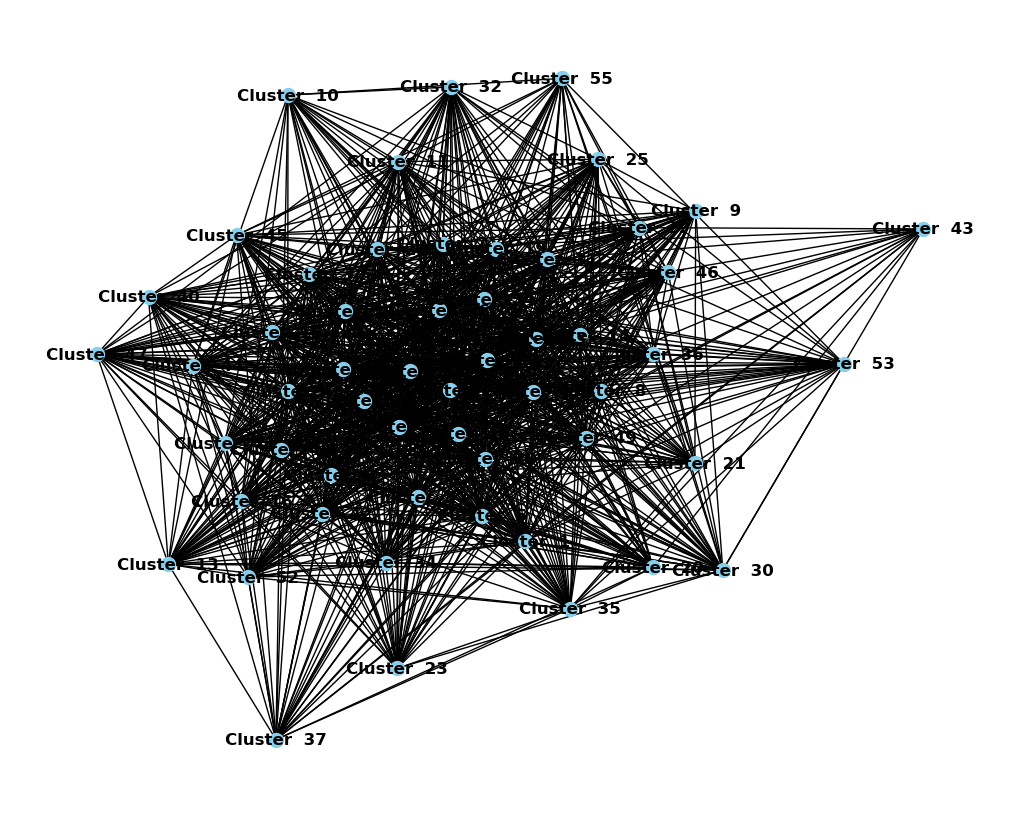

In [98]:
# Example cluster names
cluster_names = list(sbert_clusters.keys())

# Create a graph
G = nx.Graph()

# Add nodes to the graph
G.add_nodes_from(cluster_names)

# Add weighted edges to the graph based on the co-occurrence matrix
for i in range(len(cluster_names)):
    for j in range(i + 1, len(cluster_names)):
        weight = correlation_matrix[i, j]
        if weight > 0:
            G.add_edge(cluster_names[i], cluster_names[j], weight=weight)

plt.figure(figsize=(10, 8))

# Draw the graph
pos = nx.spring_layout(G, k=2, scale=2)
nx.draw(G, pos, with_labels=True, font_weight='bold', node_size=100, node_color='skyblue', font_color='black')

# Add edge labels
edge_labels = {(i, j): correlation_matrix[i, j] for i, j, d in G.edges(data=True)}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

# Show the graph
plt.show()


TypeError: list indices must be integers or slices, not str

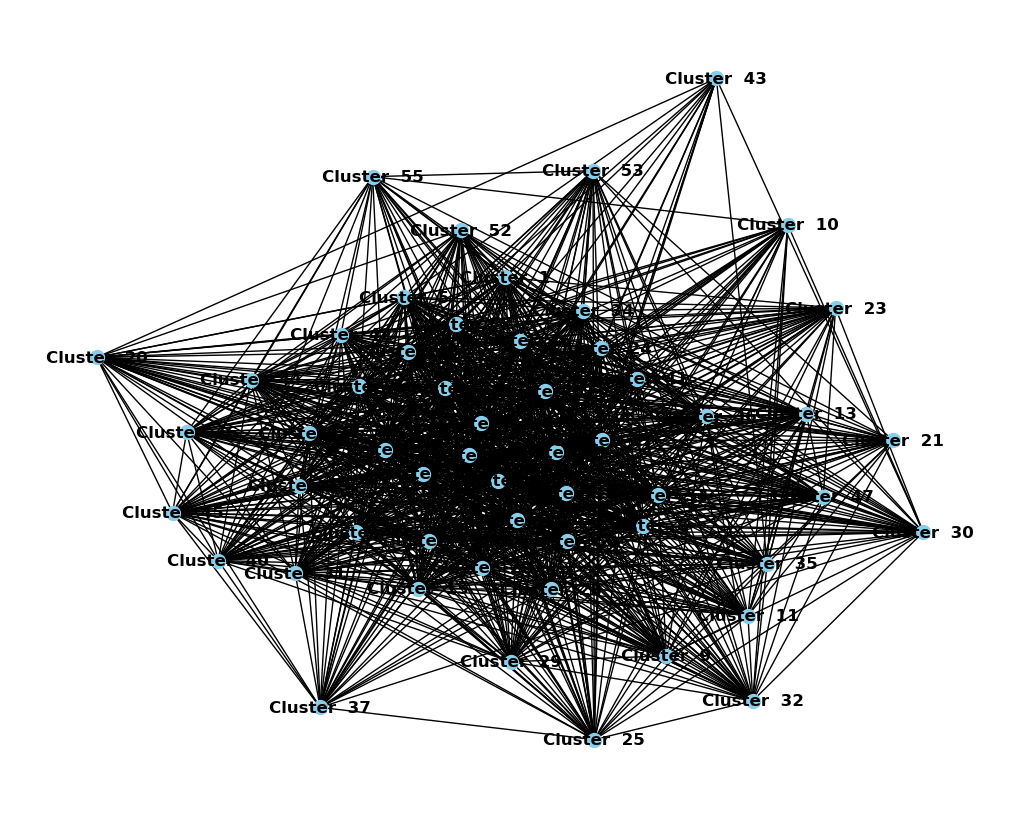

In [106]:
# Example cluster names
cluster_names = list(sbert_clusters.keys())

# Create a graph
G = nx.Graph()

# Add nodes to the graph
G.add_nodes_from(cluster_names)

# Add weighted edges to the graph based on the co-occurrence matrix
for i in range(len(cluster_names)):
    for j in range(i + 1, len(cluster_names)):
        weight = correlation_matrix[i, j]
        if weight > 0:
            G.add_edge(cluster_names[i], cluster_names[j], weight=weight)

plt.figure(figsize=(10, 8))
            
# Draw the graph
pos = nx.spring_layout(G, k=2, scale=2)
nx.draw(G, pos, with_labels=True, font_weight='bold', node_size=100, node_color='skyblue', font_color='black')

# Add edge labels
edge_labels = {(cluster_names[i], cluster_names[j]): correlation_matrix[i, j] for i, j, d in G.edges(data=True)}
# int(cluster_i.split()[-1]) - 1, int(cluster_j.split()[-1]) - 1
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

# Show the graph
plt.show()

In [105]:
for i, j, d in G.edges(data=True):
    print(i, j, d)

Cluster  1 Cluster  2 {'weight': 3}
Cluster  1 Cluster  3 {'weight': 4}
Cluster  1 Cluster  4 {'weight': 5}
Cluster  1 Cluster  5 {'weight': 11}
Cluster  1 Cluster  6 {'weight': 20}
Cluster  1 Cluster  7 {'weight': 3}
Cluster  1 Cluster  8 {'weight': 4}
Cluster  1 Cluster  9 {'weight': 5}
Cluster  1 Cluster  11 {'weight': 3}
Cluster  1 Cluster  12 {'weight': 11}
Cluster  1 Cluster  13 {'weight': 11}
Cluster  1 Cluster  14 {'weight': 6}
Cluster  1 Cluster  15 {'weight': 5}
Cluster  1 Cluster  16 {'weight': 3}
Cluster  1 Cluster  17 {'weight': 27}
Cluster  1 Cluster  18 {'weight': 4}
Cluster  1 Cluster  19 {'weight': 11}
Cluster  1 Cluster  20 {'weight': 4}
Cluster  1 Cluster  21 {'weight': 1}
Cluster  1 Cluster  22 {'weight': 7}
Cluster  1 Cluster  23 {'weight': 4}
Cluster  1 Cluster  24 {'weight': 5}
Cluster  1 Cluster  25 {'weight': 1}
Cluster  1 Cluster  26 {'weight': 12}
Cluster  1 Cluster  27 {'weight': 6}
Cluster  1 Cluster  28 {'weight': 5}
Cluster  1 Cluster  30 {'weight': 3}
Cl

In [103]:
int(cluster_names[1].split()[-1])

2

In [63]:
sbert_clusters

{'Cluster  1': ['hygiene',
  'awareness raising',
  'awareness',
  'sanitation',
  'pest control',
  'sanitary waste',
  'safety',
  'worker safety',
  'sustainable pest control',
  'polution',
  'hiv prevention',
  'road traffic safety',
  'monitoring',
  'environmental monitoring',
  'polution reduction',
  'vaccines',
  'return vat',
  'odor polution'],
 'Cluster  2': ['entrepreneurship',
  'micro small medium enterprises',
  'social impact',
  'entrepreneurial eco-system',
  'entrepreneurial ecosystem',
  'micro',
  'small',
  'medium enterprises',
  'social enterprise',
  'small medium enterprises',
  'business for change',
  'corporate responsability',
  'smes',
  'social enterprise model',
  're-invented business models',
  'social entrepreneurship',
  'business support',
  'sme',
  'socio-economic impact and needs assessment'],
 'Cluster  3': ['transportation',
  'tourism',
  'transportation & mobility',
  'adventure tourism',
  'community tourism',
  'mobility',
  'sustainable

In [49]:
cooccurrence_matrix.shape

(55, 55)

In [52]:
data['tags']

0                [clean energy, affordable energy, stove]
1                                             [education]
2       [nature-based solutions, design, sustainable f...
3       [nature-based solutions, recycling, design, su...
4       [digital platform, innovation challenges, inno...
                              ...                        
3383                        [climate change, clean water]
3384    [climate change, clean water, rain water colle...
3385    [climate change, clean water, water mobilization]
3386    [climate change, clean water, water mobilization]
3387    [clean energy, climate change, water mobilizat...
Name: tags, Length: 3388, dtype: object

# Co-occurrence with document clusters

In [397]:
doc_clusters = pd.read_csv("../Data/full_text_clustering.csv")
doc_clusters = doc_clusters.drop('Unnamed: 0', axis=1)
doc_clusters

,cluster_label,tags,tags_keybert,content
0,54,"['clean energy', 'affordable energy', 'stove']","['stove', 'cooking', 'firewood', 'combustion',...",Tikikil stove\n\nGIZ\nOffice contact GIZ Offic...
1,208,['education'],"['teachers', 'teacher', 'education', 'students...",Alokito hridoy - enlightening the souls of chi...
2,164,"['nature-based solutions', 'design', 'sustaina...","['biofabricating', 'plastics', 'crafting', 'te...",BioFabricating Materials\nSolution holder: Bat...
3,363,"['nature-based solutions', 'recycling', 'desig...","['customizable', 'acoustics', 'tools', 'lab', ...",Circulamic\nSolution holder: Batoul Al-Rashdan...
4,270,"['digital platform', 'innovation challenges', ...","['buses', 'bus', 'traffic']",Gakyid Ride (City Bus ride app)\nThis app prov...
...,...,...,...,...
3383,624,"['climate change', 'clean water']","['water', 'galvanized', 'transport', 'gutter']",Galvanized gutter\n\nGalvanized gutter for wat...
3384,624,"['climate change', 'clean water', 'rain water ...","['iron', 'galvanized', 'water', 'transport', '...",Iron Gutter\n\nGalvanized gutter for water tra...
3385,624,"['climate change', 'clean water', 'water mobil...","['water', 'pvc', 'transport', 'durm', 'gutter']",PVC Durm Gutter\n\n3 m durm gutter for water t...
3386,266,"['climate change', 'clean water', 'water mobil...","['pipe', 'rain', 'pvc', 'gutter', 'descent', '...",PVC pipe for rain descent\n\nPVC pipe for rain...


In [398]:
# Read the content of the text file
with open('../Data/combined_clusters_100_076.txt', 'r') as file:
    lines = file.readlines()

# Initialize an empty dictionary to store clusters
clusters_dict = {}

# Process each line in the file
current_cluster = None
for line in lines:
    # Strip leading and trailing whitespaces
    line = line.strip()

    # Check if the line starts with 'Cluster'
    if line.startswith('Cluster'):
        current_cluster = line  # Set the current cluster name
        clusters_dict[current_cluster] = []  # Initialize an empty list for the cluster
    elif line.startswith('[') and line.endswith(']'):
        # If inside a cluster and the line is a list, convert it to a list and append to the dictionary
        clusters_dict[current_cluster] = line

# Convert string representations to actual lists using a custom function
def convert_to_list(s):
    try:
        # Assuming the string is enclosed in square brackets, remove extra whitespaces and evaluate as a list
        return [item.strip() for item in s[1:-1].split(',')]
    except (ValueError, TypeError, IndexError):
        # Handle errors gracefully
        return []

converted_clusters = {key: convert_to_list(value) for key, value in clusters_dict.items()}
sbert_clusters = {key: [value.strip("'") for value in values] for key, values in converted_clusters.items()}
sbert_clusters

{'Cluster  1': ['rotation',
  'operators',
  'transformer',
  'transforme',
  'transformation',
  'intégration',
  'transforming',
  'integrated',
  'transformed',
  'transformés',
  'mathematics',
  'integration',
  'multiplication',
  'convert',
  'converter',
  'rotary',
  'transformé',
  'converting',
  'transformations',
  'conversion',
  'transform',
  'intégrité',
  'transformative',
  'simplified',
  'transformant',
  'factors',
  'rational',
  'convertisseur',
  'multifonction',
  'intégrée',
  'transformational',
  'integrates',
  'function',
  'basic',
  'input',
  'operator',
  'transforms',
  'transforma',
  'transformar',
  'calculator',
  'mathématique',
  'integrations',
  'integrate',
  'functional',
  'transformatrices',
  'convertirlos',
  'transformers',
  'transformarlos',
  'output',
  'integración',
  'integramos',
  'expometal',
  'simplest'],
 'Cluster  2': ['hackathon',
  'trap',
  'traps',
  'infiltrate',
  'catches',
  'hooks',
  'pressurizes',
  'hacks',
  

In [399]:
tags_x = []
for tag in doc_clusters['tags']:
    tags_x.append(ast.literal_eval(tag))
doc_clusters['tags'] = tags_x

tags_x = []
for tag in doc_clusters['tags_keybert']:
    tags_x.append(ast.literal_eval(tag))
doc_clusters['tags_keybert'] = tags_x

doc_clusters

,cluster_label,tags,tags_keybert,content
0,54,"[clean energy, affordable energy, stove]","[stove, cooking, firewood, combustion, kirkos,...",Tikikil stove\n\nGIZ\nOffice contact GIZ Offic...
1,208,[education],"[teachers, teacher, education, students, benga...",Alokito hridoy - enlightening the souls of chi...
2,164,"[nature-based solutions, design, sustainable f...","[biofabricating, plastics, crafting, technolog...",BioFabricating Materials\nSolution holder: Bat...
3,363,"[nature-based solutions, recycling, design, su...","[customizable, acoustics, tools, lab, optimizi...",Circulamic\nSolution holder: Batoul Al-Rashdan...
4,270,"[digital platform, innovation challenges, inno...","[buses, bus, traffic]",Gakyid Ride (City Bus ride app)\nThis app prov...
...,...,...,...,...
3383,624,"[climate change, clean water]","[water, galvanized, transport, gutter]",Galvanized gutter\n\nGalvanized gutter for wat...
3384,624,"[climate change, clean water, rain water colle...","[iron, galvanized, water, transport, gutter]",Iron Gutter\n\nGalvanized gutter for water tra...
3385,624,"[climate change, clean water, water mobilization]","[water, pvc, transport, durm, gutter]",PVC Durm Gutter\n\n3 m durm gutter for water t...
3386,266,"[climate change, clean water, water mobilization]","[pipe, rain, pvc, gutter, descent, cross, sect...",PVC pipe for rain descent\n\nPVC pipe for rain...


In [400]:
# Create a function to map tags to clusters
def map_tags_to_clusters(tag_list):
    clusters = []
    for key, value in sbert_clusters.items():
        for tag in tag_list:
            if tag in value:
                clusters.append(key)
        
    #clusters = [key for key, value in sbert_clusters.items() if any(tag in value for tag in tag_list)]
    return clusters

# Apply the function to create the 'clusters' column
doc_clusters['tag_clusters'] = doc_clusters['tags'].apply(map_tags_to_clusters)
doc_clusters['tag_keybert_clusters'] = doc_clusters['tags_keybert'].apply(map_tags_to_clusters)

In [401]:
doc_clusters

,cluster_label,tags,tags_keybert,content,tag_clusters,tag_keybert_clusters
0,54,"[clean energy, affordable energy, stove]","[stove, cooking, firewood, combustion, kirkos,...",Tikikil stove\n\nGIZ\nOffice contact GIZ Offic...,"[Cluster 39, Cluster 98, Cluster 98]","[Cluster 6, Cluster 8, Cluster 8, Cluster ..."
1,208,[education],"[teachers, teacher, education, students, benga...",Alokito hridoy - enlightening the souls of chi...,[Cluster 47],"[Cluster 8, Cluster 8, Cluster 8, Cluster ..."
2,164,"[nature-based solutions, design, sustainable f...","[biofabricating, plastics, crafting, technolog...",BioFabricating Materials\nSolution holder: Bat...,"[Cluster 8, Cluster 38, Cluster 61]","[Cluster 8, Cluster 8, Cluster 41, Cluster ..."
3,363,"[nature-based solutions, recycling, design, su...","[customizable, acoustics, tools, lab, optimizi...",Circulamic\nSolution holder: Batoul Al-Rashdan...,"[Cluster 8, Cluster 13, Cluster 38, Cluster...","[Cluster 9, Cluster 9, Cluster 9, Cluster ..."
4,270,"[digital platform, innovation challenges, inno...","[buses, bus, traffic]",Gakyid Ride (City Bus ride app)\nThis app prov...,"[Cluster 8, Cluster 14, Cluster 32, Cluster...","[Cluster 20, Cluster 20, Cluster 40]"
...,...,...,...,...,...,...
3383,624,"[climate change, clean water]","[water, galvanized, transport, gutter]",Galvanized gutter\n\nGalvanized gutter for wat...,"[Cluster 42, Cluster 67]","[Cluster 11, Cluster 20, Cluster 41, Cluste..."
3384,624,"[climate change, clean water, rain water colle...","[iron, galvanized, water, transport, gutter]",Iron Gutter\n\nGalvanized gutter for water tra...,"[Cluster 42, Cluster 67, Cluster 67]","[Cluster 11, Cluster 20, Cluster 41, Cluste..."
3385,624,"[climate change, clean water, water mobilization]","[water, pvc, transport, durm, gutter]",PVC Durm Gutter\n\n3 m durm gutter for water t...,"[Cluster 42, Cluster 67, Cluster 67]","[Cluster 11, Cluster 20, Cluster 67, Cluste..."
3386,266,"[climate change, clean water, water mobilization]","[pipe, rain, pvc, gutter, descent, cross, sect...",PVC pipe for rain descent\n\nPVC pipe for rain...,"[Cluster 42, Cluster 67, Cluster 67]","[Cluster 8, Cluster 11, Cluster 59, Cluster..."


In [402]:
df = doc_clusters

# Define a custom aggregation function
def aggregate_lists(lists):
    result = []
    for lst in lists:
        result.extend(lst)
    return list(set(result))

# Group by 'cluster_label' and aggregate 'tags' using the custom function
grouped_df = df.groupby('cluster_label').agg({'tags': aggregate_lists, \
                                              'tags_keybert': aggregate_lists, \
                                              'tag_clusters': aggregate_lists, \
                                              'tag_keybert_clusters': aggregate_lists}).reset_index()

# Print the resulting DataFrame
grouped_df

,cluster_label,tags,tags_keybert,tag_clusters,tag_keybert_clusters
0,0,"[biogas, biomass, plastic and pollution, wood ...","[biomass, evaporative, charcoal, greenhouse, m...","[Cluster 13, Cluster 98, Cluster 9, Cluster...","[Cluster 78, Cluster 98, Cluster 18, Cluste..."
1,1,"[free of packaging, re-use, youth and unemploy...","[improved, recyclable, wastebaskets, equipment...","[Cluster 78, Cluster 13, Cluster 98, Cluste...","[Cluster 98, Cluster 18, Cluster 20, Cluste..."
2,2,"[fintech, health and wellbeing]","[sale, innovating, card, healthcare, banglades...","[Cluster 8, Cluster 32]","[Cluster 43, Cluster 32, Cluster 9, Cluster..."
3,3,"[agriculture, environmental education, women e...","[financial, economic, cola, daughters, permit,...","[Cluster 78, Cluster 13, Cluster 70, Cluste...","[Cluster 78, Cluster 61, Cluster 5, Cluster..."
4,4,"[plastic and pollution, art, environment frien...","[bottles, beaches, plastic, baskets, polytechn...","[Cluster 13, Cluster 77, Cluster 19]","[Cluster 13, Cluster 39, Cluster 41, Cluste..."
...,...,...,...,...,...
755,755,"[education, digitalization, access to educatio...","[computer, computers, donate]","[Cluster 71, Cluster 14, Cluster 47]","[Cluster 14, Cluster 8]"
756,756,[health],"[therapeutic, covid, vault, tuberculosis, figh...",[Cluster 32],"[Cluster 24, Cluster 89, Cluster 9, Cluster..."
757,757,"[re-purpose, re-use, safety]","[material, drum, building, flattened, construc...","[Cluster 13, Cluster 9]","[Cluster 78, Cluster 19, Cluster 41, Cluste..."
758,758,"[access to technology & internet, affordable a...","[economic, ridden, flowershop, motors, harvest...","[Cluster 20, Cluster 14, Cluster 8, Cluster...","[Cluster 98, Cluster 49, Cluster 18, Cluste..."


In [403]:
df = grouped_df

# Initialize a co-occurrence matrix
num_clusters = len(sbert_clusters.keys())
correlation_matrix = np.zeros((num_clusters, num_clusters), dtype=int)
document_counts = np.zeros(num_clusters, dtype=int)

# Iterate through each row in the dataframe
for tags in df['tag_clusters']:
    
    for tag in tags:
        cluster_index = int(tag.split()[-1]) - 1
        document_counts[cluster_index] += 1
    
    # Update the matrix based on the co-occurrence of clusters in each row
    for i in range(len(tags)):
        for j in range(i + 1, len(tags)):
            # Find the indices of the clusters in the matrix
            index_i = int(tags[i].split()[-1]) - 1
            index_j = int(tags[j].split()[-1]) - 1

            # Update the matrix
            correlation_matrix[index_i, index_j] += 1
            correlation_matrix[index_j, index_i] += 1

# Create a DataFrame from the matrix
correlation_df = pd.DataFrame(correlation_matrix, columns=sbert_clusters.keys(), index=sbert_clusters.keys())

# Normalize the correlation_df
for i in range(len(correlation_df.index)):
    for j in range(i + 1, len(correlation_df.columns)):
        denominator = document_counts[i] + document_counts[j]
        if denominator > 0:
            correlation_df.iloc[i, j] /= denominator
            correlation_df.iloc[j, i] /= denominator

print("Correlation Matrix:")
correlation_df

Correlation Matrix:


,Cluster 1,Cluster 2,Cluster 3,Cluster 4,Cluster 5,Cluster 6,Cluster 7,Cluster 8,Cluster 9,Cluster 10,...,Cluster 91,Cluster 92,Cluster 93,Cluster 94,Cluster 95,Cluster 96,Cluster 97,Cluster 98,Cluster 99,Cluster 100
Cluster 1,0.0,0,0,0.000000,0.000000,0.005376,0.000000,0.002232,0.005464,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0,0,0.000000,0.000000,0
Cluster 2,0.0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0,0,0.000000,0.000000,0
Cluster 3,0.0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0,0,0.000000,0.000000,0
Cluster 4,0.0,0,0,0.000000,0.045455,0.035714,0.076923,0.019651,0.025907,0.000000,...,0.050000,0.018519,0.000000,0.095238,0.046512,0,0,0.040323,0.055556,0
Cluster 5,0.0,0,0,0.045455,0.000000,0.158451,0.009901,0.146520,0.163701,0.044248,...,0.027778,0.112676,0.045872,0.053846,0.103448,0,0,0.108491,0.072581,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Cluster 96,0.0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0,0,0.000000,0.000000,0
Cluster 97,0.0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0,0,0.000000,0.000000,0
Cluster 98,0.0,0,0,0.040323,0.108491,0.164430,0.008696,0.153571,0.138983,0.023622,...,0.032787,0.096154,0.024390,0.076389,0.090426,0,0,0.000000,0.094203,0
Cluster 99,0.0,0,0,0.055556,0.072581,0.071429,0.037037,0.044492,0.072464,0.025641,...,0.058824,0.088235,0.085714,0.053571,0.080000,0,0,0.094203,0.000000,0


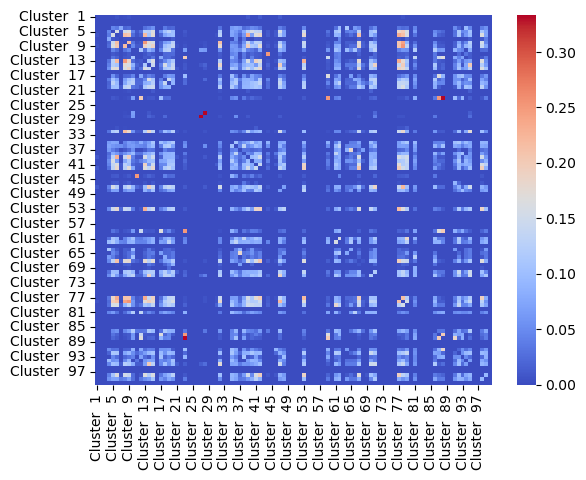

In [404]:
sns.heatmap(correlation_df, annot=False, cmap="coolwarm", linewidths=0)
plt.show()

In [405]:
# Set your correlation threshold (adjust as needed)
correlation_threshold = 0.3

# Iterate through the upper triangle of the correlation matrix
high_correlation_combinations = []
for i in range(len(sbert_clusters)):
    for j in range(i + 1, len(sbert_clusters)):
        if correlation_df.iloc[i, j] >= correlation_threshold:
            cluster1 = correlation_df.columns[i]
            cluster2 = correlation_df.columns[j]
            high_correlation_combinations.append((cluster1, cluster2))

# Print or use high_correlation_combinations as needed
print("High Correlation Combinations:")
print(high_correlation_combinations)

High Correlation Combinations:
[('Cluster  23', 'Cluster  88'), ('Cluster  27', 'Cluster  28')]


In [406]:
clusters_to_find = ['Cluster  23', 'Cluster  88']
filtered_rows = doc_clusters[doc_clusters['tag_clusters'].apply(lambda x: \
                                                                any(cluster in x for cluster in clusters_to_find))]
filtered_rows[['cluster_label', 'content', 'tags', 'tag_clusters']]

,cluster_label,content,tags,tag_clusters
890,376,The power of faith facing of the weakness of t...,"[waste reduction, youth empowerment, affordabl...","[Cluster 8, Cluster 13, Cluster 14, Cluster..."
1175,481,Hidroeléctrica comunitaria Nebaj\n\nEl proyect...,"[clean energy, community involment, community ...","[Cluster 8, Cluster 8, Cluster 88, Cluster ..."
1179,481,Hidroeléctrica comunitaria La Taña\n\nEl colec...,"[clean energy, community involment, community ...","[Cluster 8, Cluster 8, Cluster 88, Cluster ..."
3041,481,Energía Solar Para Todos \n\nKintek es una emp...,"[clean energy, community involment, panels]","[Cluster 8, Cluster 23, Cluster 98]"
3138,481,Hidroeléctrica comunitaria Tajumulco\n\nLa Mic...,"[clean energy, community involment, renewable ...","[Cluster 8, Cluster 8, Cluster 88, Cluster ..."
3149,481,Hidroeléctrica comunitaria\n\nEl colectivo ha ...,"[clean energy, community involment, hidroelect...","[Cluster 8, Cluster 88, Cluster 98]"


# Co-occurrence using Auto tags

In [407]:
df = grouped_df

# Initialize a co-occurrence matrix
num_clusters = len(sbert_clusters.keys())
correlation_matrix = np.zeros((num_clusters, num_clusters), dtype=int)
document_counts = np.zeros(num_clusters, dtype=int)

# Iterate through each row in the dataframe
for tags in df['tag_keybert_clusters']:
    
    for tag in tags:
        cluster_index = int(tag.split()[-1]) - 1
        document_counts[cluster_index] += 1
    
    # Update the matrix based on the co-occurrence of clusters in each row
    for i in range(len(tags)):
        for j in range(i + 1, len(tags)):
            # Find the indices of the clusters in the matrix
            index_i = int(tags[i].split()[-1]) - 1
            index_j = int(tags[j].split()[-1]) - 1

            # Update the matrix
            correlation_matrix[index_i, index_j] += 1
            correlation_matrix[index_j, index_i] += 1

# Create a DataFrame from the matrix
correlation_df = pd.DataFrame(correlation_matrix, columns=sbert_clusters.keys(), index=sbert_clusters.keys())

# Normalize the correlation_df
for i in range(len(correlation_df.index)):
    for j in range(i + 1, len(correlation_df.columns)):
        denominator = document_counts[i] + document_counts[j]
        if denominator > 0:
            correlation_df.iloc[i, j] /= denominator
            correlation_df.iloc[j, i] /= denominator

print("Correlation Matrix:")
correlation_df

Correlation Matrix:


,Cluster 1,Cluster 2,Cluster 3,Cluster 4,Cluster 5,Cluster 6,Cluster 7,Cluster 8,Cluster 9,Cluster 10,...,Cluster 91,Cluster 92,Cluster 93,Cluster 94,Cluster 95,Cluster 96,Cluster 97,Cluster 98,Cluster 99,Cluster 100
Cluster 1,0.000000,0.083333,0.158879,0.058140,0.139394,0.096677,0.028571,0.102996,0.116484,0.162393,...,0.170854,0.064516,0.076190,0.011905,0.094737,0,0.015152,0.134409,0.099448,0.040000
Cluster 2,0.083333,0.000000,0.070588,0.031250,0.076923,0.093851,0.060241,0.068359,0.076212,0.084211,...,0.112994,0.070423,0.096386,0.032258,0.068493,0,0.000000,0.054878,0.062893,0.056604
Cluster 3,0.158879,0.070588,0.000000,0.079365,0.161972,0.081169,0.060976,0.078278,0.076389,0.127660,...,0.113636,0.057143,0.060976,0.065574,0.055556,0,0.023256,0.104294,0.075949,0.057692
Cluster 4,0.058140,0.031250,0.079365,0.000000,0.049587,0.034843,0.016393,0.038776,0.038929,0.123288,...,0.051613,0.040816,0.032787,0.025000,0.098039,0,0.000000,0.049296,0.043796,0.000000
Cluster 5,0.139394,0.076923,0.161972,0.049587,0.000000,0.163934,0.057143,0.154657,0.175510,0.164474,...,0.170940,0.054688,0.078571,0.033613,0.076923,0,0.009901,0.131222,0.138889,0.054545
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Cluster 96,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0,0.000000,0.000000,0.000000,0.000000
Cluster 97,0.015152,0.000000,0.023256,0.000000,0.009901,0.003745,0.024390,0.002128,0.002558,0.018868,...,0.007407,0.034483,0.000000,0.000000,0.000000,0,0.000000,0.008197,0.008547,0.090909
Cluster 98,0.134409,0.054878,0.104294,0.049296,0.131222,0.173127,0.105590,0.172881,0.172211,0.086705,...,0.164706,0.087248,0.074534,0.021429,0.039735,0,0.008197,0.000000,0.223629,0.045802
Cluster 99,0.099448,0.062893,0.075949,0.043796,0.138889,0.180628,0.083333,0.158974,0.167984,0.071429,...,0.184000,0.069444,0.064103,0.022222,0.041096,0,0.008547,0.223629,0.000000,0.063492


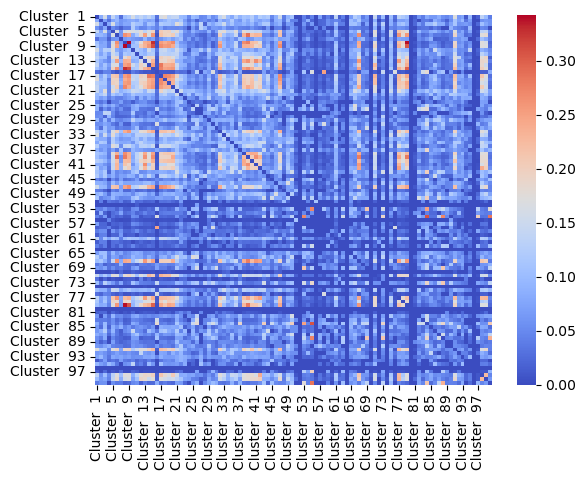

In [408]:
sns.heatmap(correlation_df, annot=False, cmap="coolwarm", linewidths=0)
plt.show()

In [409]:
# Set your correlation threshold (adjust as needed)
correlation_threshold = 0.3

# Iterate through the upper triangle of the correlation matrix
high_correlation_combinations = []
for i in range(len(sbert_clusters)):
    for j in range(i + 1, len(sbert_clusters)):
        if correlation_df.iloc[i, j] >= correlation_threshold:
            cluster1 = correlation_df.columns[i]
            cluster2 = correlation_df.columns[j]
            high_correlation_combinations.append((cluster1, cluster2))

# Print or use high_correlation_combinations as needed
print("High Correlation Combinations:")
print(high_correlation_combinations)

High Correlation Combinations:
[('Cluster  8', 'Cluster  9'), ('Cluster  8', 'Cluster  15'), ('Cluster  8', 'Cluster  79'), ('Cluster  9', 'Cluster  15'), ('Cluster  9', 'Cluster  79'), ('Cluster  55', 'Cluster  84')]


In [410]:
clusters_to_find = ['Cluster  8', 'Cluster  9']
filtered_rows = doc_clusters[doc_clusters['tag_keybert_clusters'].apply(lambda x: \
                                                                any(cluster in x for cluster in clusters_to_find))]
filtered_rows[['cluster_label', 'content', 'tags_keybert', 'tag_keybert_clusters']]

,cluster_label,content,tags_keybert,tag_keybert_clusters
0,54,Tikikil stove\n\nGIZ\nOffice contact GIZ Offic...,"[stove, cooking, firewood, combustion, kirkos,...","[Cluster 6, Cluster 8, Cluster 8, Cluster ..."
1,208,Alokito hridoy - enlightening the souls of chi...,"[teachers, teacher, education, students, benga...","[Cluster 8, Cluster 8, Cluster 8, Cluster ..."
2,164,BioFabricating Materials\nSolution holder: Bat...,"[biofabricating, plastics, crafting, technolog...","[Cluster 8, Cluster 8, Cluster 41, Cluster ..."
3,363,Circulamic\nSolution holder: Batoul Al-Rashdan...,"[customizable, acoustics, tools, lab, optimizi...","[Cluster 9, Cluster 9, Cluster 9, Cluster ..."
5,758,Self-acting water pump\n\nJaleta Muleta\ninfo@...,"[pumping, pump, wind, rural, water, powered, i...","[Cluster 8, Cluster 9, Cluster 9, Cluster ..."
...,...,...,...,...
3371,195,Generación Eólica Para Hogares \n\nEl proyecto...,"[desarrollando, eólica, potencial, mejorando, ...","[Cluster 6, Cluster 8, Cluster 8, Cluster ..."
3373,364,PVC sheets\n\nit is a resistant and durable ma...,"[durable, water, pvc, resistant, reservoirs, p...","[Cluster 9, Cluster 9, Cluster 38, Cluster ..."
3374,465,Geomembrane\n\nthey are geosynthetic sheets th...,"[geosynthetic, geomembrane, infiltration, soil...","[Cluster 6, Cluster 8, Cluster 9, Cluster ..."
3375,83,PVC Tile\n\nPlastic shingles fulfill the same ...,"[shingles, plastic, better, aesthetically, til...","[Cluster 6, Cluster 9, Cluster 9, Cluster ..."
